In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Machine-Learning-Workshop/master/Chapter02/Examples/Wholesale%20customers%20data.csv")

In [3]:
data.shape

(440, 8)

In [4]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
outlier = {}
for i in range(data.shape[1]):
    min_=data[data.columns[i]].mean()-(3*data[data.columns[i]].std())
    max_=data[data.columns[i]].mean()+(3*data[data.columns[i]].std())
    count=0
    for j in data[data.columns[i]]:
        if j < min_ or j > max_:
            count += 1
    outlier[data.columns[i]]= [count,data.shape[0]-count]

print(outlier)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


(array([267., 109.,  38.,  16.,   4.,   3.,   2.,   0.,   0.,   1.]),
 array([3.000000e+00, 1.121780e+04, 2.243260e+04, 3.364740e+04,
        4.486220e+04, 5.607700e+04, 6.729180e+04, 7.850660e+04,
        8.972140e+04, 1.009362e+05, 1.121510e+05]),
 <BarContainer object of 10 artists>)

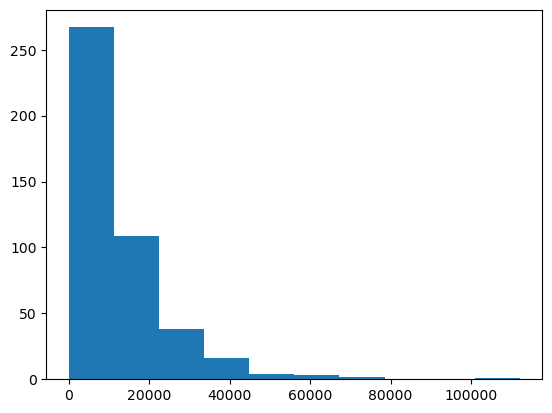

In [6]:
plt.hist(data['Fresh'])


([<matplotlib.patches.Wedge at 0x1bd6916ef40>,
 [Text(1.0971973259042975, 0.07847310385386075, 'outliers'),
  Text(-1.0971973203939083, -0.07847318089913086, 'data')],
 [Text(0.5984712686750714, 0.042803511193014954, '2.27%'),
  Text(-0.5984712656694045, -0.042803553217707735, '97.73%')])

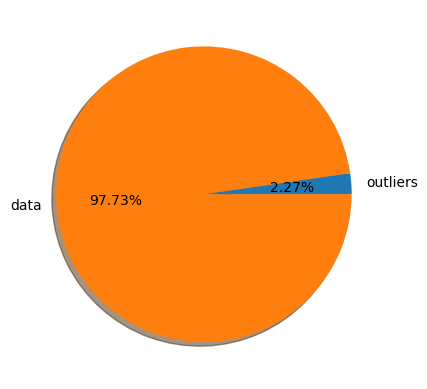

In [7]:
label = ["outliers","data"]
plt.pie(outlier['Detergents_Paper'],labels=label,shadow=True,autopct='%.2f%%')

In [8]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data['Channel']=b.fit_transform(data['Channel'])
data['Region']=b.fit_transform(data['Region'])

In [9]:
data.shape

(440, 8)

In [10]:
import seaborn as sns
data =pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Machine-Learning-Workshop/master/Chapter02/Exercise2.01/circles.csv")

In [11]:
data.isnull().sum()

0    0
1    0
dtype: int64

In [12]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i,random_state=0)
    est_kmeans.fit(data)
   
    ideal_k.append([i,est_kmeans.inertia_])

C:\Users\97155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [14]:
ideal_k = np.array(ideal_k)


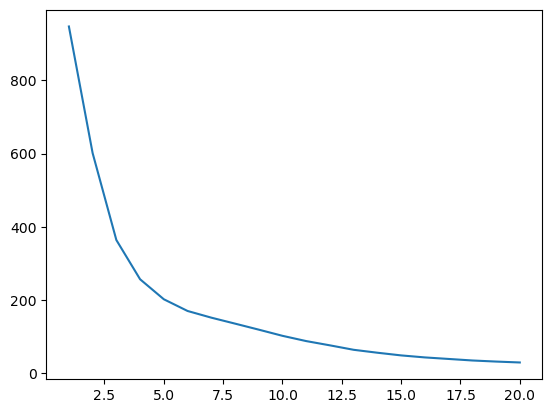

In [15]:
plt.plot(ideal_k[:,0],ideal_k[:,1])

In [16]:
est_kmeans = KMeans(n_clusters=5,random_state=0)
est_kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [17]:
pred_kmeans= est_kmeans.predict(data)

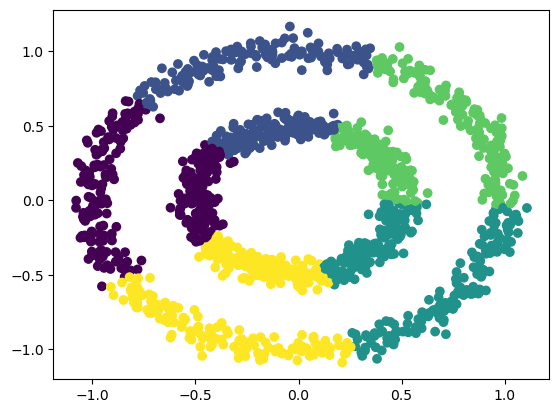

In [18]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=pred_kmeans)

In [26]:
from sklearn.cluster import MeanShift

In [19]:
data=pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Machine-Learning-Workshop/master/Chapter02/Activity2.02/wholesale_customers_data.csv")

In [20]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [22]:
outliers = {}
for i in range(data.shape[1]):
    min_=data[data.columns[i]].mean()-(3*data[data.columns[i]].std())
    max_=data[data.columns[i]].mean()+(3*data[data.columns[i]].std())
    count=0
    for j in data[data.columns[i]]:
        if j> max_ or j< min_:
            count+=1
        outliers[data.columns[i]]=[count,data.shape[0]-count]

In [23]:
outliers

{'Channel': [0, 440],
 'Region': [0, 440],
 'Fresh': [7, 433],
 'Milk': [9, 431],
 'Grocery': [7, 433],
 'Frozen': [6, 434],
 'Detergents_Paper': [10, 430],
 'Delicassen': [4, 436]}

([<matplotlib.patches.Wedge at 0x1bd6c664730>,
 [Text(1.0971973259042975, 0.07847310385386075, 'Outliers'),
  Text(-1.0971973203939083, -0.07847318089913086, 'data')],
 [Text(0.5984712686750714, 0.042803511193014954, '2.27%'),
  Text(-0.5984712656694045, -0.042803553217707735, '97.73%')])

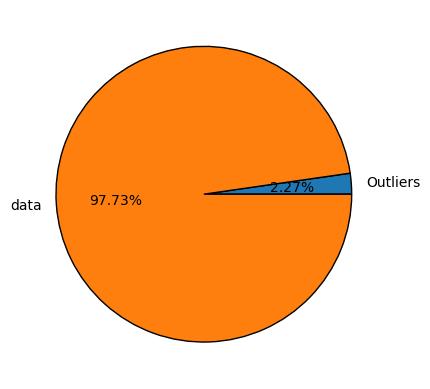

In [24]:
plt.pie(outliers['Detergents_Paper'],labels=['Outliers','data'],autopct="%.2f%%",wedgeprops={'edgecolor':'black'})

In [27]:
est_meanshift=MeanShift(bandwidth=.5)
est_meanshift.fit(data)
y_pred = est_meanshift.predict(data)

Text(0, 0.5, 'Milk')

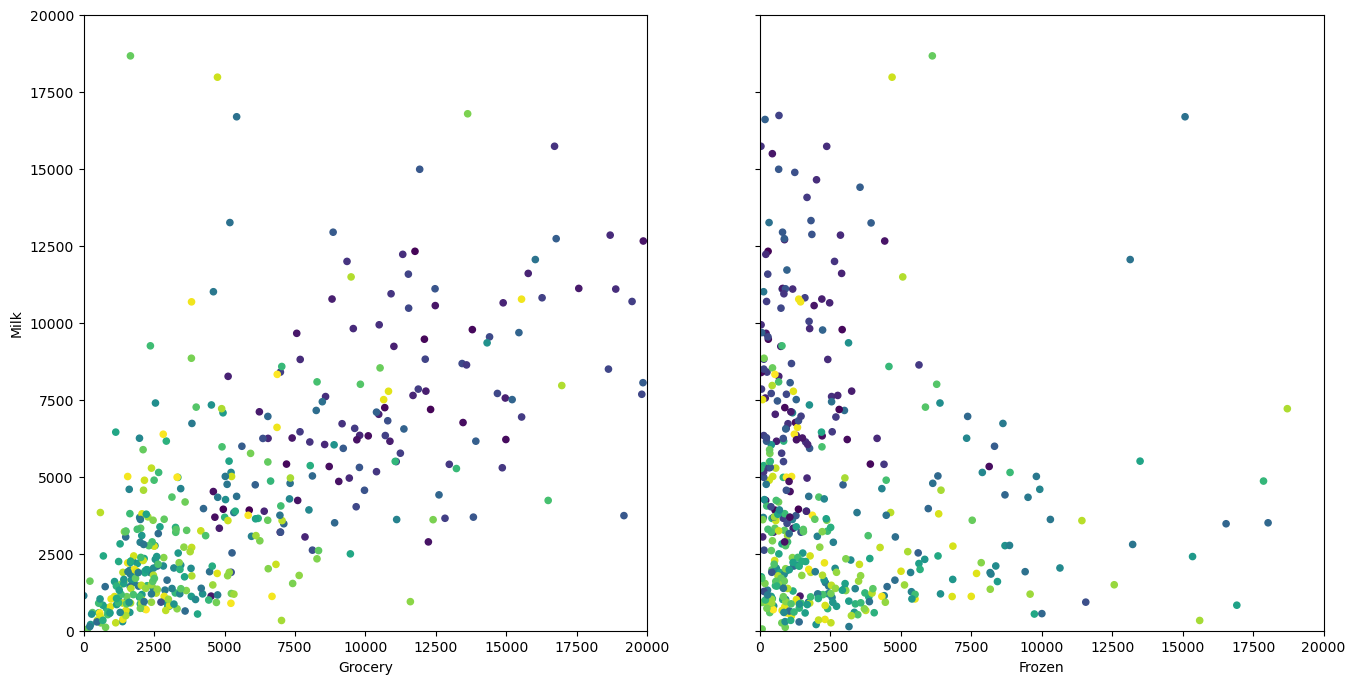

In [28]:
plt.subplots(1,2,sharex='col',sharey='row',figsize=(16,8))
plt.scatter(data.iloc[:,5],data.iloc[:,3],c=y_pred,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel("Frozen")
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4],data.iloc[:,3],c=y_pred,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel("Grocery")
plt.ylabel("Milk")

In [29]:
from sklearn.cluster import DBSCAN
estmation = DBSCAN(eps=1)
prediction = estmation.fit_predict(data)

Text(0, 0.5, 'Milk')

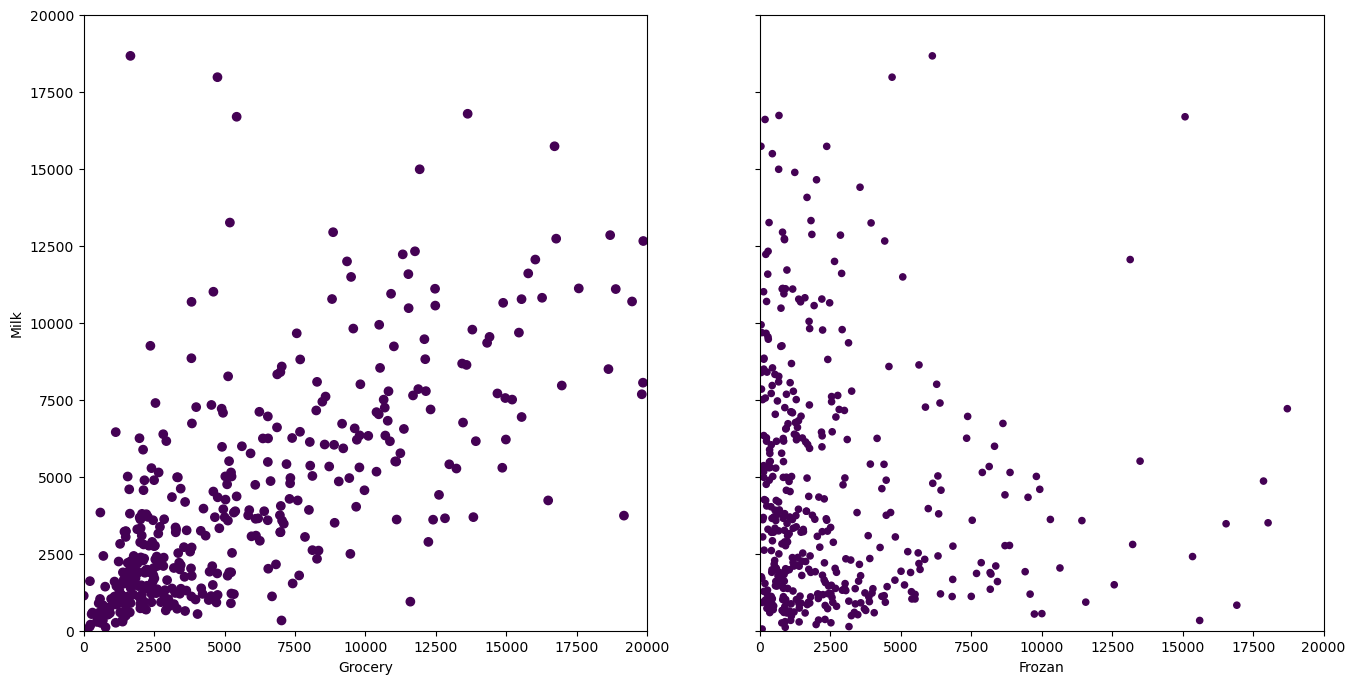

In [30]:
plt.subplots(1,2,sharex='col',sharey='row',figsize=(16,8))
plt.scatter(data.iloc[:,5],data.iloc[:,3],c=prediction,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel("Frozan")
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4],data.iloc[:,3],c=prediction)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel("Grocery")
plt.ylabel("Milk")